# Laptop Price Prediction

In [192]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set()

In [193]:
# importing Dataset
train_data=pd.read_csv("laptop_data.csv")

# Feature Engineering and EDA

In [194]:
# to the shape of the dataset
train_data.shape

(1303, 11)

In [195]:
# to check the null or NA values in any column of the dataset
train_data.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [196]:
# to check the duplicate row values
train_data.duplicated().sum()

29

In [197]:
# reomving duplicate rows
train_data.drop_duplicates(inplace=True)

In [198]:
# to check the info about dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


In [199]:
#to remove the GB and kg from both the columns
train_data['Ram']=train_data['Ram'].str.replace('GB','')
train_data['Weight']=train_data['Weight'].str.replace('kg','')

In [200]:
train_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [201]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


In [202]:
# to change the datatype of Ram and weight
train_data['Ram']=train_data['Ram'].astype('int32')
train_data['Weight']=train_data['Weight'].astype('float32')

In [203]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


<Axes: xlabel='Company'>

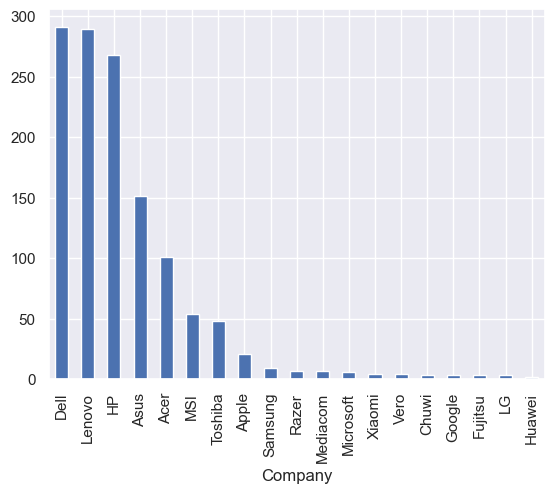

In [204]:
# EDA of company column
train_data['Company'].value_counts().plot(kind='bar')

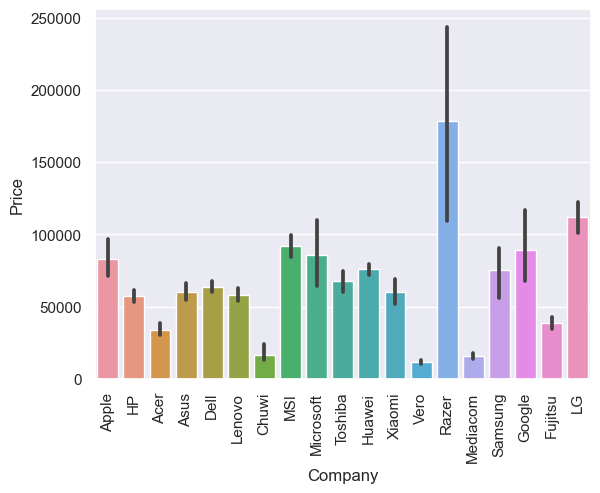

In [205]:
sns.barplot(x=train_data['Company'],y=train_data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

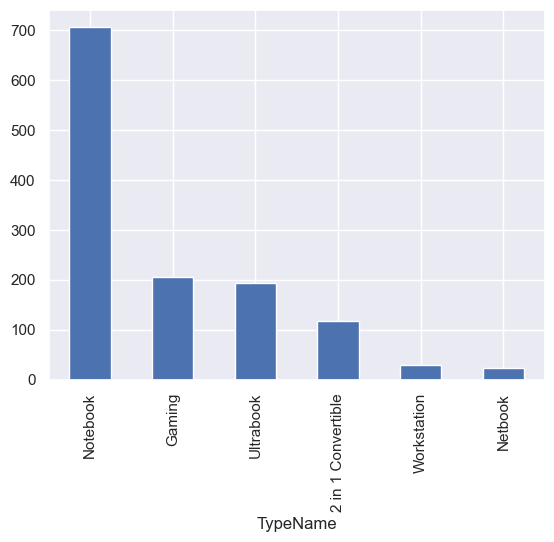

In [206]:
# EDA on TypeName
train_data['TypeName'].value_counts().plot(kind='bar')

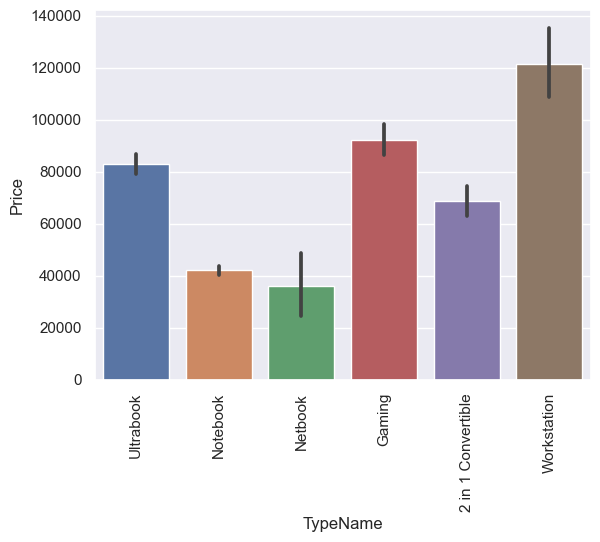

In [207]:
sns.barplot(x=train_data['TypeName'],y=train_data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [208]:
# feature engineering on screen resolution column carrying out touch screen info
train_data['TouchScreen']=train_data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

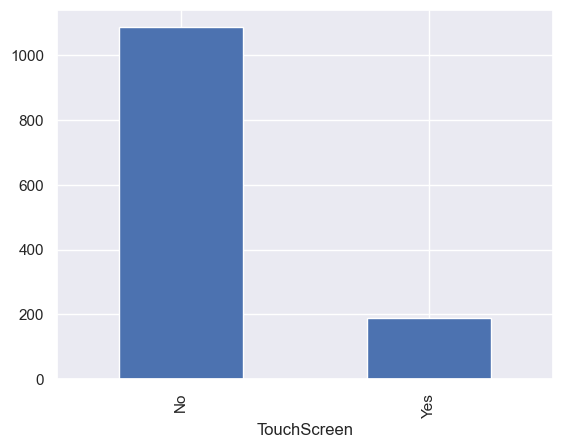

In [209]:
#EDA on touch screen column
train_data['TouchScreen'].value_counts().plot(kind='bar')
plt.xticks([0,1],['No','Yes'])
plt.show()

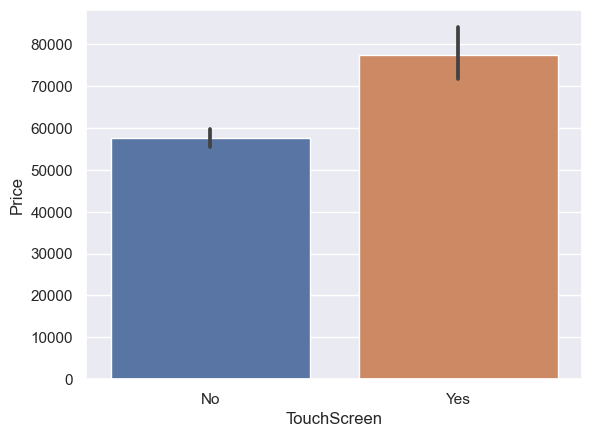

In [210]:
sns.barplot(x=train_data['TouchScreen'],y=train_data['Price'])
plt.xticks([0,1],['No','Yes'])
plt.show()

In [211]:
#carrying out IPS info
train_data['IPS']=train_data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

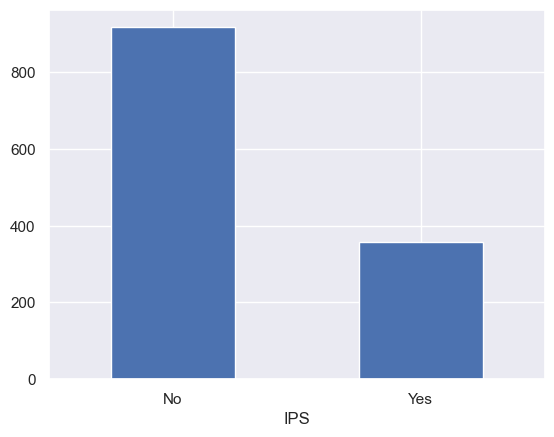

In [212]:
#EDA on IPS column
train_data['IPS'].value_counts().plot(kind='bar')
plt.xticks([0,1],['No','Yes'],rotation='horizontal')
plt.show()

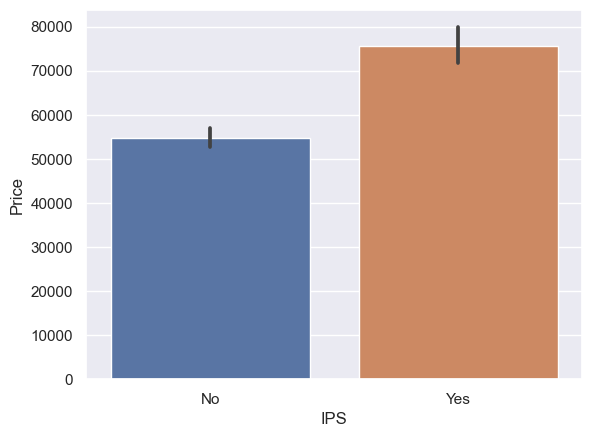

In [213]:
sns.barplot(x=train_data['IPS'],y=train_data['Price'])
plt.xticks([0,1],['No','Yes'])
plt.show()

In [214]:
X_res=[]
Y_res=[]
for i in range(len(train_data['ScreenResolution'])):
    sc_list=train_data['ScreenResolution'][i].split(" ")
    for j in range(len(sc_list)):
        if sc_list[j][0].isdigit() and 'x' in sc_list[j]:
            X_res.append(sc_list[j].split('x')[0])
            Y_res.append(sc_list[j].split('x')[1])

train_data['X_Res']=pd.DataFrame(X_res).astype('int32')
train_data['Y_Res']=pd.DataFrame(Y_res).astype('int32')

In [215]:
#to find the PPI value from inches, X and Y resolution value and dropping the remaining columns after finding the correlation
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  X_Res             1274 non-null   int32  
 14  Y_Res             1274 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 171.6+ KB


In [216]:
# PPI value
train_data['PPI'] = (((train_data['X_Res']**2) + (train_data['Y_Res']**2))**0.5/train_data['Inches']).astype('float')

In [217]:
# as per PPI corr value dropping the X_res, Y_res,screenresolution and inches columns  
train_data.drop(columns=['X_Res','Y_Res','Inches','ScreenResolution'],inplace=True)

In [218]:
# feature engineering on CPU column and performing EDA
train_data['Speed']=train_data['Cpu'].str.split(' ').str[-1].str.replace('GHz','').astype('float32')

In [219]:
#train_data['Cpu brand']=train_data['Cpu'].apply(lambda x:(x.replace(x.split(' ')[-1],'')))
#carrying out first 3 elements from cpu column
train_data['Cpu details']=train_data['Cpu'].apply(lambda x:" ".join((x.split(' '))[0:3]))

In [220]:
def cpu_details(val):
    if val=='Intel Core i7' or val=='Intel Core i5' or val=='Intel Core i3':
        return val
    elif val.split(' ')[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [221]:
train_data['Cpu Processor']=train_data['Cpu details'].apply(cpu_details)

# dropping cpu_details and Cpu column
train_data.drop(columns=['Cpu details','Cpu'],inplace=True)

<Axes: xlabel='Cpu Processor'>

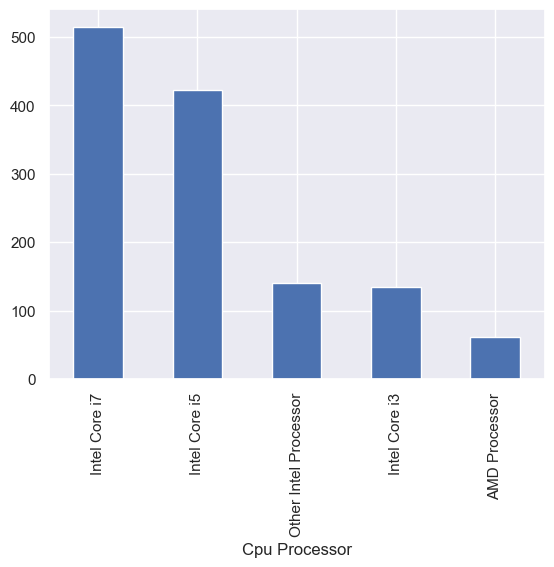

In [222]:
train_data['Cpu Processor'].value_counts().plot(kind='bar')

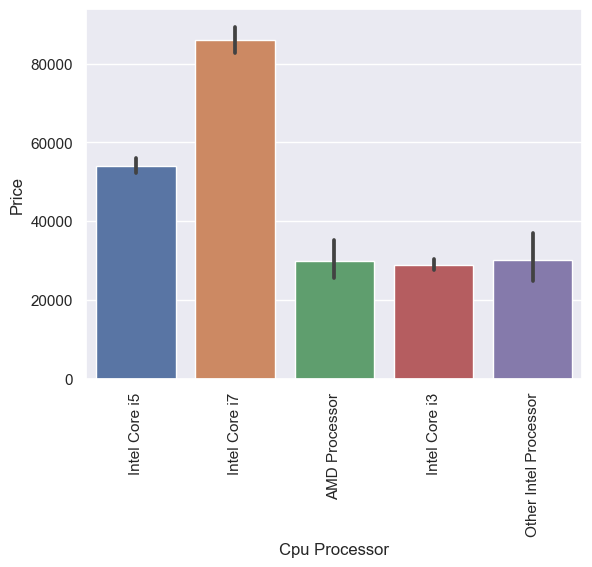

In [223]:
sns.barplot(x=train_data['Cpu Processor'],y=train_data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [224]:
# feature engineering on Memory column and performing EDA
# carrying out Memory info and cpu data from Cpu column

train_data['Memory'].replace(" \+ ","",regex=True,inplace=True)
train_data['Memory'].replace("\.","",regex=True,inplace=True)
train_data['Memory'].replace("GB ","",regex=True,inplace=True)
train_data['Memory'].replace("TB ","000",regex=True,inplace=True)
train_data['Memory'].replace("Flash Storage","FlashStorage",regex=True,inplace=True)
train_data[['SSD','Flash Storage','HDD','Hybrid']]=[0,0,0,0]

for i in range(len(train_data['Memory'])):
    train_data['Memory'][i].strip()
    if ' ' in train_data['Memory'][i]:
        splits=train_data['Memory'][i].split(" ")
        for j in range(len(splits)):
            if 'SSD' in splits[j]:
                train_data['SSD'][i]=splits[j].split("SSD")[0]
            if 'FlashStorage' in splits[j]:
                train_data['Flash Storage'][i]=splits[j].split("FlashStorage")[0]
            if 'HDD' in splits[j]:
                train_data['HDD'][i]=splits[j].split("HDD")[0]    
            if 'Hybrid' in splits[j]:
                train_data['Hybrid'][i]=splits[j].split("Hybrid")[0]   
    else:
        if 'SSD' in train_data['Memory'][i]:
            train_data['SSD'][i]=train_data['Memory'][i].split("SSD")[0]
        if 'FlashStorage' in train_data['Memory'][i]:
            train_data['Flash Storage'][i]=train_data['Memory'][i].split("FlashStorage")[0]
        if 'HDD' in train_data['Memory'][i]:
            train_data['HDD'][i]=train_data['Memory'][i].split("HDD")[0]    
        if 'Hybrid' in train_data['Memory'][i]:
            train_data['Hybrid'][i]=train_data['Memory'][i].split("Hybrid")[0]  

# droppoing Memory Column as we have extracted all the useful insight from Memory column
train_data.drop('Memory',axis=1,inplace=True) #Droping Memory column

In [225]:
# dropping the Hybrid and HDD columns due to negative corelation
train_data.drop(columns=['Flash Storage','Hybrid'],inplace=True)

In [226]:
train_data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Speed,Cpu Processor,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,2.3,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,1.8,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,2.5,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,2.7,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,3.1,Intel Core i5,256,0


In [227]:
# feature engineering on Gpu column and performing EDA

# Extracting the Gpu brand from the Gpu column
train_data['Gpu Brand']=train_data['Gpu'].str.split(' ').str[0]

# dropping the Gpu column
train_data.drop(columns=['Gpu'],inplace=True)

In [228]:
train_data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Speed,Cpu Processor,SSD,HDD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,2.3,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,1.8,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,2.5,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,2.7,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,3.1,Intel Core i5,256,0,Intel


In [229]:
train_data['Gpu Brand'].value_counts()

Gpu Brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [230]:
train_data=train_data[train_data['Gpu Brand'] != 'ARM']

<Axes: xlabel='Gpu Brand'>

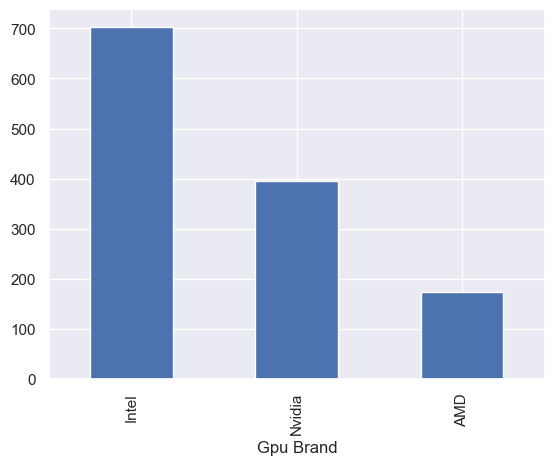

In [231]:
train_data['Gpu Brand'].value_counts().plot(kind='bar')

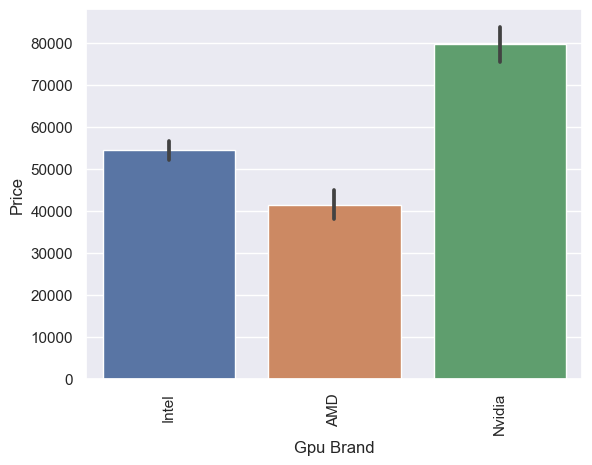

In [232]:
sns.barplot(x=train_data['Gpu Brand'],y=train_data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='OpSys'>

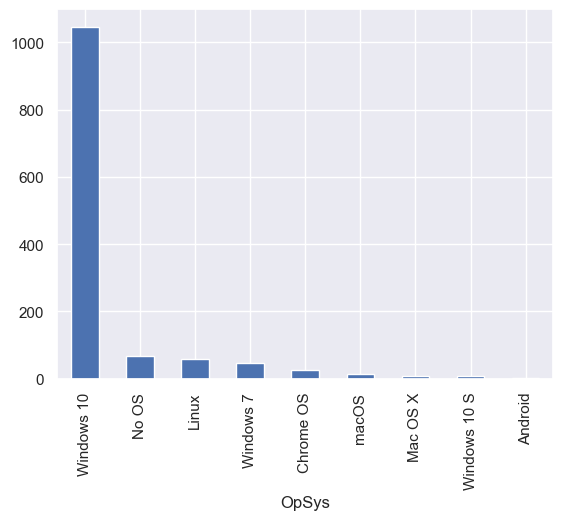

In [233]:
# EDA on OpSys
train_data['OpSys'].value_counts().plot(kind='bar')

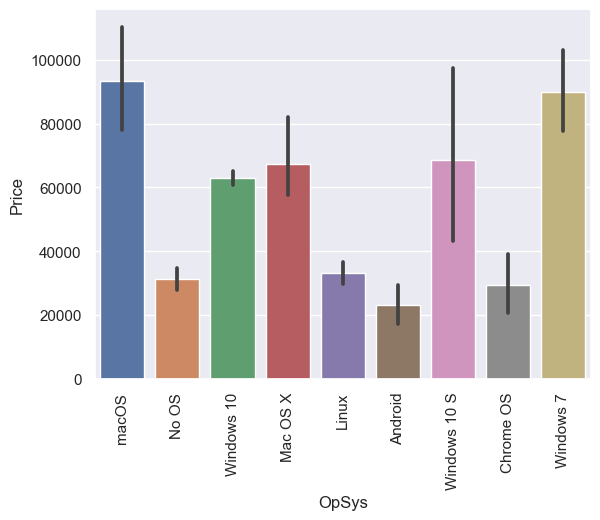

In [234]:
sns.barplot(x=train_data['OpSys'],y=train_data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [235]:
def cat_bif(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [236]:
train_data['OS']=train_data['OpSys'].apply(cat_bif)

In [237]:
train_data.drop(columns=['OpSys'],inplace=True)

<Axes: xlabel='OS'>

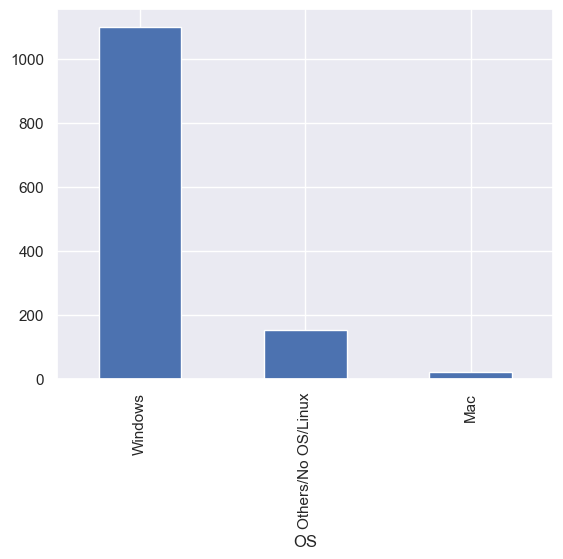

In [238]:
train_data['OS'].value_counts().plot(kind='bar')

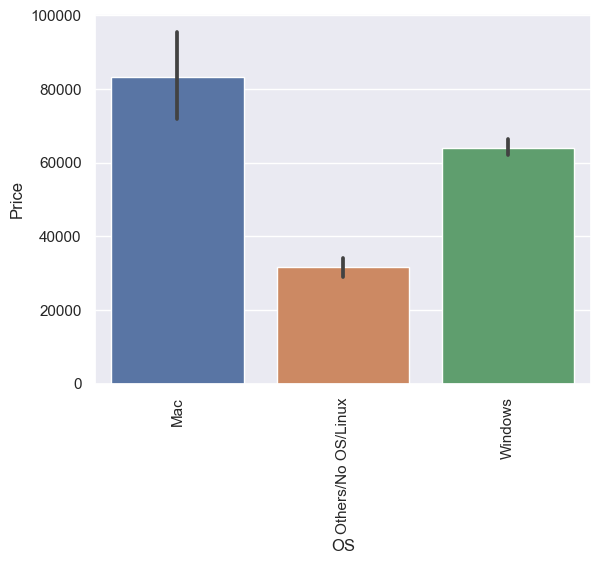

In [239]:
sns.barplot(x=train_data['OS'],y=train_data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

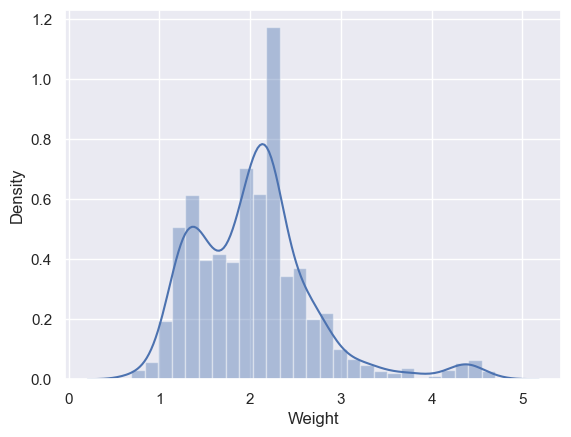

In [240]:
# EDA on weight column

sns.distplot(train_data['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

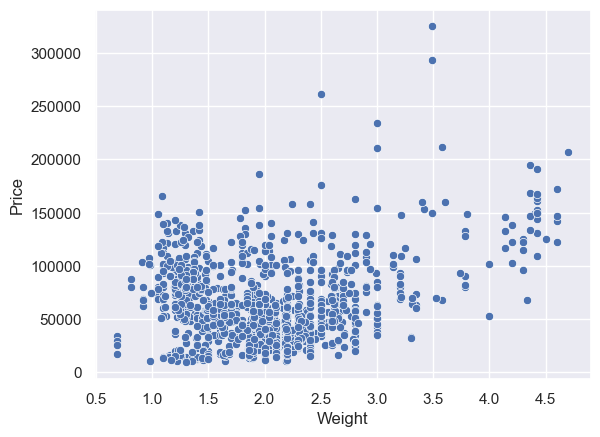

In [241]:
sns.scatterplot(x=train_data['Weight'],y=train_data['Price'])

<Axes: xlabel='Price', ylabel='Density'>

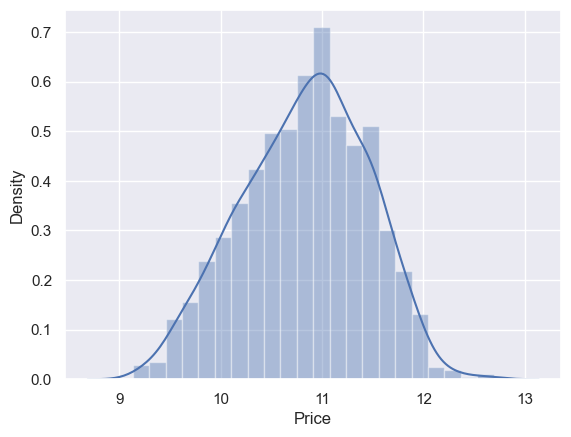

In [242]:
sns.distplot(np.log(train_data['Price']))

# Fitting model using different Algorithms

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [243]:
X=train_data.drop(columns=['Price'])
y=np.log(train_data['Price'])

In [244]:
X.head(10)

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Speed,Cpu Processor,SSD,HDD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,2.3,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,1.8,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,2.5,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,2.7,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,3.1,Intel Core i5,256,0,Intel,Mac
5,Acer,Notebook,4,2.10,0,0,100.454670,3.0,AMD Processor,0,500,AMD,Windows
6,Apple,Ultrabook,16,2.04,0,1,220.534624,2.2,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,8,1.34,0,0,127.677940,1.8,Intel Core i5,0,0,Intel,Mac
8,Asus,Ultrabook,16,1.30,0,0,157.350512,1.8,Intel Core i7,512,0,Nvidia,Windows
9,Acer,Ultrabook,8,1.60,0,1,157.350512,1.6,Intel Core i5,256,0,Intel,Windows


In [245]:
y.head(10)

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
5     9.967026
6    11.644108
7    11.030615
8    11.285443
9    10.621952
Name: Price, dtype: float64

In [246]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [247]:
X_train

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Speed,Cpu Processor,SSD,HDD,Gpu Brand,OS
716,Dell,Notebook,8,1.90,0,0,141.211998,2.6,Intel Core i5,256,0,Intel,Windows
21,Lenovo,Gaming,8,2.50,0,1,141.211998,2.5,Intel Core i5,128,1000,Nvidia,Windows
968,Dell,Gaming,32,4.42,0,1,127.335675,2.8,Intel Core i7,256,1000,Nvidia,Windows
273,Lenovo,2 in 1 Convertible,16,1.36,1,0,209.800683,2.6,Intel Core i7,512,0,Intel,Windows
1234,Apple,Ultrabook,4,1.08,0,0,135.094211,1.6,Intel Core i5,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,2.0,Intel Core i3,0,500,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,2.7,Intel Core i7,512,0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,2.5,AMD Processor,0,1000,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,2.0,Intel Core i3,0,2000,Nvidia,Others/No OS/Linux


In [248]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

In [249]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

## Random Forest

In [250]:
step1= ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])],remainder='passthrough')

step2=RandomForestRegressor()

reg=Pipeline([('step',step1),('step2',step2)])

reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)

print("R2 Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 Score 0.8516376478317329
MAE 0.17982193747793304


## SVM

In [251]:
step1= ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])],remainder='passthrough')

step2=SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe=Pipeline([('step',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print("R2 Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 Score 0.8316496917380527
MAE 0.19825127214731406


## Gradient Boost

In [252]:
step1= ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8552889510062313
MAE 0.1737356347267903


## XgBoost

In [253]:
step1= ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8761094695231163
MAE 0.1672539199985524


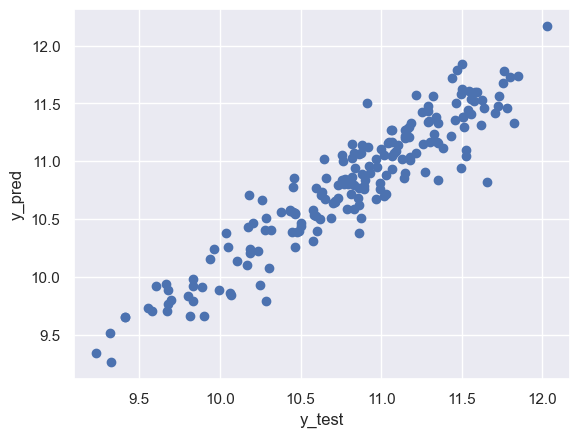

In [254]:
plt.scatter(y_test, y_pred, color='b')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV** --> search whole parameter for the best params
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [255]:
from sklearn.model_selection import RandomizedSearchCV

In [256]:
n_estimators=[int(x) for x in np.linspace(start=500,stop=1000,num=100)]

max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]

max_features=['auto','sqrt']

min_samples_split=[2,5,10,15,100]

min_samples_leaf=[1,2,5,10]

In [257]:
random_grid={
    'step2__n_estimators':n_estimators,
    'step2__max_depth':max_depth,
    'step2__max_features':max_features,
    'step2__min_samples_split':min_samples_split,
    'step2__min_samples_leaf':min_samples_leaf
}

In [258]:
random_grid=RandomizedSearchCV(reg,param_distributions=random_grid,cv=5,verbose=False,scoring='neg_mean_squared_error',n_jobs=-1,n_iter=10,random_state=42)

In [259]:
random_grid.fit(X_train,y_train)
# reg.get_params().keys()

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('col_tnf',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               [0,
                                                                                1,
                                                                                8,
                                                                                11,
                                                                                12])])),
                                             ('step2',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'step2__max_depth': [5, 10, 15, 20, 25,
                                                             30],
                                        'step2__max_features': ['auto', 'sqrt'],
                                        'step2__min_samples_leaf': [1, 2, 5,
                                                                    10],
                                        'step2__min_samples_split': [2, 5, 10,
                                                                     15, 100],
                                        'step2__n_estimators': [500, 505, 510,
                                                                515, 520, 525,
                                                                530, 535, 540,
                                                                545, 550, 555,
                                                                560, 565, 570,
                                                                575, 580, 585,
                                                                590, 595, 601,
                                                                606, 611, 616,
                                                                621, 626, 631,
                                                                636, 641, 646, ...]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=False)

In [260]:
prediction=random_grid.predict(X_test)

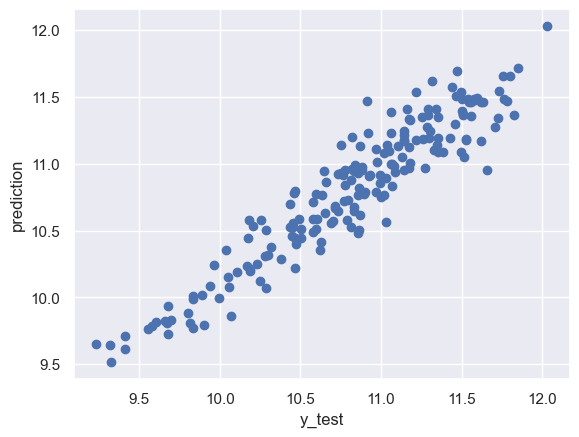

In [261]:
plt.scatter(y_test, prediction, color='b')
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

In [262]:
print("R2 Score",r2_score(y_test,prediction))
print("MAE",mean_absolute_error(y_test,prediction))

R2 Score 0.8863393185750513
MAE 0.1632380894958076


##  Exporting the Model

In [263]:
import pickle

pickle.dump(train_data,open("df.pkl",'wb'))
# exporting pipe regression model of xgboost instead of reg model of random forest [hyperparameter tunned] because of high accuracy
pickle.dump(reg,open('model.pkl','wb'))